## Word Cloud Analysis

First of, we start by neccesary packages:

In [7]:
import os
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import json

Then, the NLTK packages for the text cleaning is downloaded if they haven't been already:

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lukasjonsson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukasjonsson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Then, a function for cleaning and processing the text is defined:

In [5]:
def clean_and_preprocess_text(raw_text):
    """
    Clean and preprocess text data.

    Parameters:
    - raw_text (str): The raw text to be cleaned and processed.

    Returns:
    - tokens (list): A list of preprocessed and cleaned tokens.

    """
    text = re.sub(r'\[\[(.*?)\]\]', '', raw_text)  # Remove internal links
    text = re.sub(r'<(.*?)>', '', text)  # Remove HTML tags
    text = re.sub(r'==[^=]*==', '', text)  # Remove '==' sections

    text = ' '.join(text.split())

    tokens = nltk.word_tokenize(text)

    tokens = [token.lower() for token in tokens]

    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.isalnum()]

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens


Here, the descriptions of each episode is imported for text analysis:

In [8]:
json_file_path_season_desc = '/Users/lukasjonsson/Desktop/DTU/Kandidat/3. semester/Social graphs & interactions/Project/socialGraphsProject/data/episodes_seasons_descriptions.json'

with open(json_file_path_season_desc, 'r') as file:
    season_desc_dict = json.load(file)

Now, we combine all the episode descriptions into a dict with each season name as the key:

In [14]:
combined_synopsis_text = {}

for arc_name, episodes_list in season_desc_dict.items():
    episode_synopsis_texts = [episode.get('episode_synopsis_text', '') for episode in episodes_list if episode.get('episode_synopsis_text') is not None]

    combined_text = ' '.join(episode_synopsis_texts)

    combined_synopsis_text[arc_name] = combined_text


Now, the functions clean_and_preprocess_text is called upon each season for text analysis:

In [10]:
season1 = []
cleaned_tokens = clean_and_preprocess_text(combined_synopsis_text['Naruto: Original'])
season1.extend(cleaned_tokens)

season2 = []
cleaned_tokens = clean_and_preprocess_text(combined_synopsis_text['Naruto: Shippūden'])
season2.extend(cleaned_tokens)

season3 = []
cleaned_tokens = clean_and_preprocess_text(combined_synopsis_text['Boruto: Naruto Next Generations'])
season3.extend(cleaned_tokens)


From here, each token for each season is joined together into a string from where the word-clouds can be computed:

First up, season one (Naruto: Original):

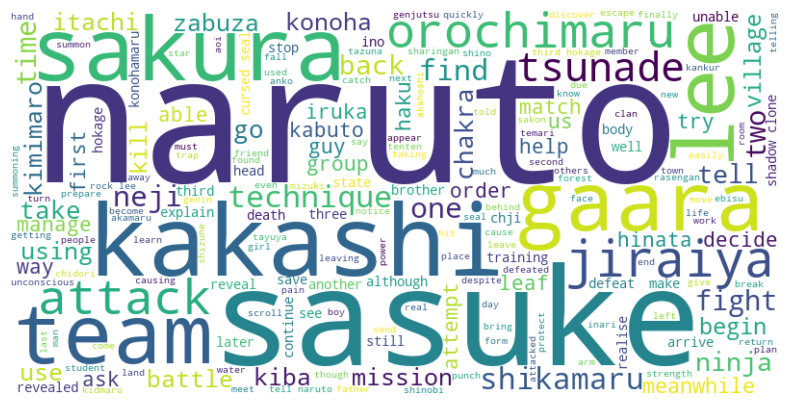

In [11]:
season1_text = ' '.join(season1)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(season1_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Then the second season (Naruto: Shippūden):

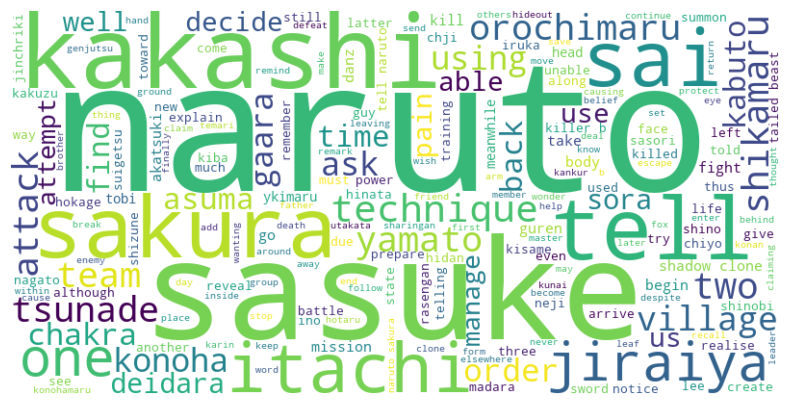

In [12]:
season2_text = ' '.join(season2)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(season2_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


And finally, the last season (Boruto: Naruto Next Generations):

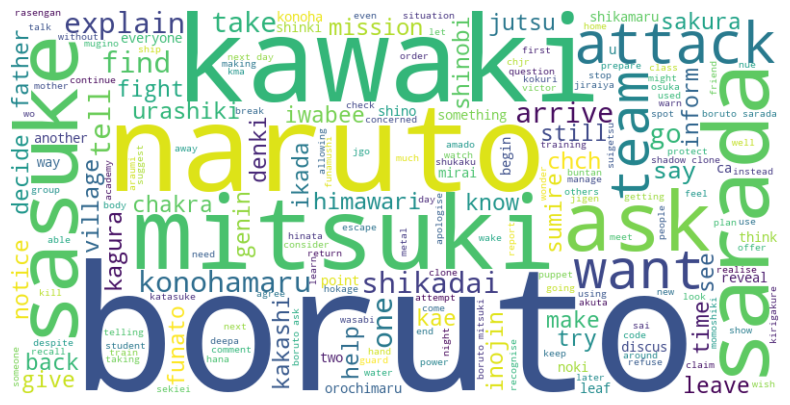

In [13]:
season3_text = ' '.join(season3)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(season3_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
